In [88]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib
import plotly.graph_objects as go
import matplotlib.ticker as ticker
import os
import functools as ft
import requests as req
import json, requests

In [89]:
# Chamando a API
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  raw_json = requests.get(url)
  # Realizando a conversão do json para um formato acessível ao python
  df_json = json.loads(raw_json.text)
  # Transformando os dados em um DataFrame do Pandas
  df = pd.DataFrame(df_json)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  df.index = pd.to_datetime(df.index, format='%d%m%Y')
  df = df.replace(',','.', regex=True).astype(float)
  return df

In [91]:
# Definição dos códigos BCB e Consulta dos datasets
# Pessoas jurídicas
   # TAXAS MÉDIAS
      # 22019	Taxa média de juros das operações de crédito com recursos livres - Pessoas jurídicas - Cartão de crédito rotativo
      # 22020	Taxa média de juros das operações de crédito com recursos livres - Pessoas jurídicas - Cartão de crédito parcelado
      # 22021	Taxa média de juros das operações de crédito com recursos livres - Pessoas jurídicas - Cartão de crédito total
   # INADIMPLÊNCIA
      # 21104	Inadimplência da carteira de crédito com recursos livres - Pessoas jurídicas - Cartão de crédito rotativo
      # 21105	Inadimplência da carteira de crédito com recursos livres - Pessoas jurídicas - Cartão de crédito parcelado
      # 21106	Inadimplência da carteira de crédito com recursos livres - Pessoas jurídicas - Cartão de crédito total
# Pessoas físicas
   # TAXAS MÉDIAS
      # 22022	Taxa média de juros das operações de crédito com recursos livres - Pessoas físicas - Cartão de crédito rotativo
      # 22023	Taxa média de juros das operações de crédito com recursos livres - Pessoas físicas - Cartão de crédito parcelado
      # 22024	Taxa média de juros das operações de crédito com recursos livres - Pessoas físicas - Cartão de crédito total
   # INADIMPLÊNCIA
      # 21127	Inadimplência da carteira de crédito com recursos livres - Pessoas físicas - Cartão de crédito rotativo
      # 21128	Inadimplência da carteira de crédito com recursos livres - Pessoas físicas - Cartão de crédito parcelado
      # 21129	Inadimplência da carteira de crédito com recursos livres - Pessoas físicas - Cartão de crédito total

tx_cred_pjur_rotativo = consulta_bc(22019)
tx_cred_pfis_rotativo = consulta_bc(22022)
inadimp_pfis_rotativo = consulta_bc(21127)
inadimp_pjur_rotativo = consulta_bc(21104)

tx_cred_pjur_parcelado = consulta_bc(22020)
tx_cred_pfis_parcelado = consulta_bc(22023)
inadimp_pfis_parcelado = consulta_bc(21128)
inadimp_pjur_parcelado = consulta_bc(21105)

tx_cred_pjur_total = consulta_bc(22021)
tx_cred_pfis_total = consulta_bc(22024)
inadimp_pfis_total = consulta_bc(21129)
inadimp_pjur_total = consulta_bc(21106)

# Criação da matrizes de Correlação com os datasets.

In [92]:
dfs_rotativo = [tx_cred_pjur_rotativo,inadimp_pjur_rotativo,tx_cred_pfis_rotativo,inadimp_pfis_rotativo]
dfs_total = [tx_cred_pjur_total,inadimp_pjur_total,tx_cred_pfis_total,inadimp_pfis_total]
dfs_parcelado = [tx_cred_pjur_parcelado,inadimp_pjur_parcelado,tx_cred_pfis_parcelado,inadimp_pfis_parcelado]

In [93]:
df_rotativo = ft.reduce(lambda left, right: pd.merge(left, right, on='data'), dfs_rotativo)
df_rotativo.columns = ['Taxa Média de Juros - Pessoa Jurídica ', '% Indadimplência - Pessoa Jurídica',
                    'Taxa Média de Juros - Pessoa Física','% Indadimplência - Pessoa Física']

<ipython-input-93-72fee6782159>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'valor_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_rotativo = ft.reduce(lambda left, right: pd.merge(left, right, on='data'), dfs_rotativo)


In [94]:
df_total = ft.reduce(lambda left, right: pd.merge(left, right, on='data'), dfs_total)
df_total.columns = ['Taxa Média de Juros - Pessoa Jurídica ', '% Indadimplência - Pessoa Jurídica',
                    'Taxa Média de Juros - Pessoa Física','% Indadimplência - Pessoa Física']

<ipython-input-94-2ce66081926f>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'valor_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_total = ft.reduce(lambda left, right: pd.merge(left, right, on='data'), dfs_total)


In [95]:
df_parcelado = ft.reduce(lambda left, right: pd.merge(left, right, on='data'), dfs_parcelado)
df_parcelado.columns = ['Taxa Média de Juros - Pessoa Jurídica ', '% Indadimplência - Pessoa Jurídica',
                    'Taxa Média de Juros - Pessoa Física','% Indadimplência - Pessoa Física']

<ipython-input-95-8a250ed5c3e2>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'valor_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_parcelado = ft.reduce(lambda left, right: pd.merge(left, right, on='data'), dfs_parcelado)


In [96]:
correlation_rotativo = df_rotativo.corr()
correlation_total = df_total.corr()
correlation_parcelado = df_parcelado.corr()

# Plotagem de gráficos e correlações

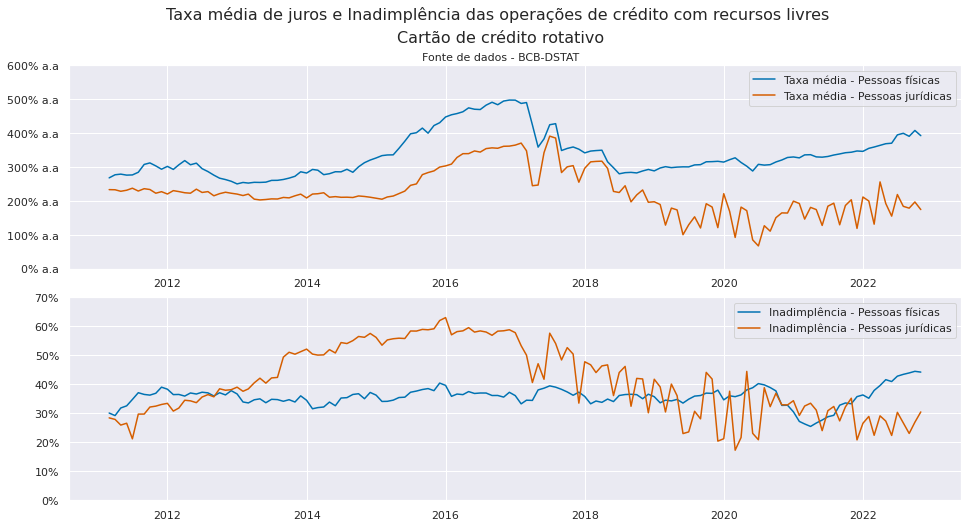

In [97]:
matplotlib.rcParams['figure.figsize'] = (16,8)
fig, (ax1,ax2) = plt.subplots(2, sharex=False)
#Títulos do gráfico
plt.text(x=0.5, y=0.96, s="Taxa média de juros e Inadimplência das operações de crédito com recursos livres ", fontsize=16, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.92, s= "Cartão de crédito rotativo", fontsize=16, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.89, s= "Fonte de dados - BCB-DSTAT", fontsize=11, ha="center", transform=fig.transFigure)
#Plotagem das Séries
ax1.plot(tx_cred_pfis_rotativo, color='#0072B2')
ax1.plot(tx_cred_pjur_rotativo, color='#D55E00')
ax2.plot(inadimp_pfis_rotativo, color='#0072B2')
ax2.plot(inadimp_pjur_rotativo, color='#D55E00')
#Legenda dos Rótulos
ax1.legend(['Taxa média - Pessoas físicas','Taxa média - Pessoas jurídicas'], fontsize=11)
ax2.legend(['Inadimplência - Pessoas físicas','Inadimplência - Pessoas jurídicas'], fontsize=11)
#Escalando os valores e formatando o eixo y
scale_y = 1
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}% a.a'.format(x/scale_y))
ax1.yaxis.set_major_formatter(ticks_y)
ticks_y2 = ticker.FuncFormatter(lambda x, pos: '{0:g}%'.format(x/scale_y))
ax2.yaxis.set_major_formatter(ticks_y2)
#Definindo limites dos eixos y
ax1.set_ylim([0,600])
ax2.set_ylim([0,70])
#Ajuste de espaçamento entre subplots
plt.subplots_adjust(hspace=.14)
plt.show()

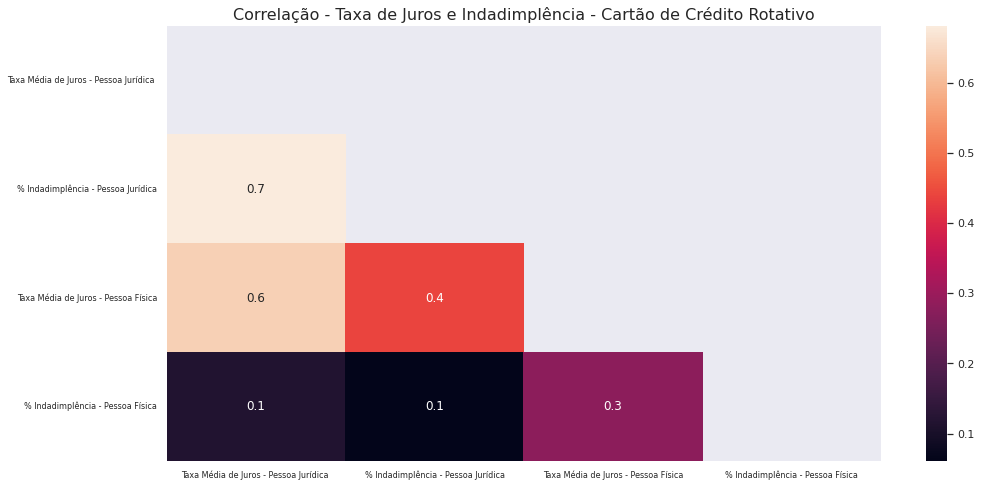

In [106]:
f, ax = plt.subplots(figsize=(16,8))
# Generate a mask for upper triangle
mask = np.triu(np.ones_like(correlation_rotativo, dtype=bool))
# Configure a palette colormap
cmap = sns.color_palette("rocket", as_cmap=True)
# Draw the heatmap
plot = sns.heatmap(correlation_rotativo, annot=True, mask = mask, fmt=".1f", cmap=cmap)
plot.set_yticklabels(plot.get_yticklabels(), rotation = 0, fontsize = 8)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 0, fontsize = 8)
plot.set_title('Correlação - Taxa de Juros e Indadimplência - Cartão de Crédito Rotativo', fontsize = 16)
plot

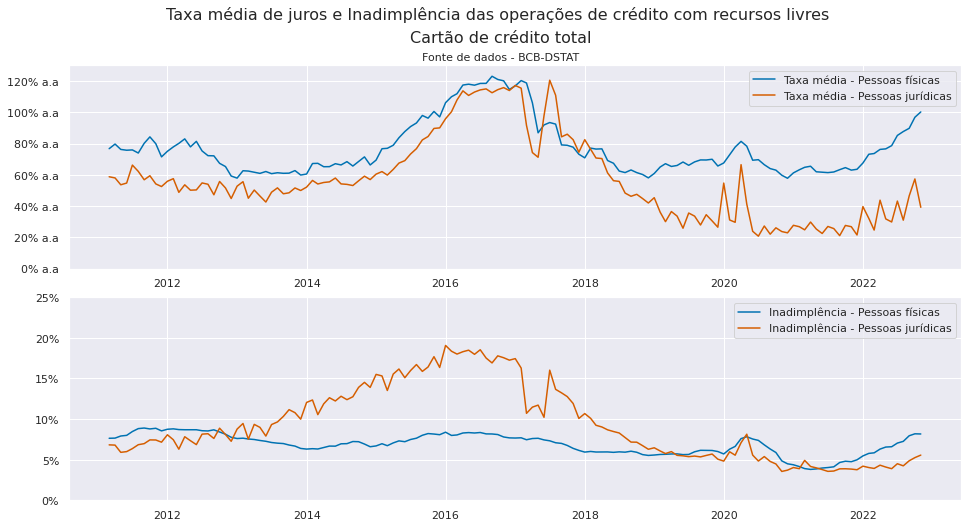

In [99]:
matplotlib.rcParams['figure.figsize'] = (16,8)
fig, (ax1,ax2) = plt.subplots(2, sharex=False)
#Títulos do gráfico
plt.text(x=0.5, y=0.96, s="Taxa média de juros e Inadimplência das operações de crédito com recursos livres ", fontsize=16, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.92, s= "Cartão de crédito total", fontsize=16, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.89, s= "Fonte de dados - BCB-DSTAT", fontsize=11, ha="center", transform=fig.transFigure)
#Plotagem das Séries
ax1.plot(tx_cred_pfis_total, color='#0072B2')
ax1.plot(tx_cred_pjur_total, color='#D55E00')
ax2.plot(inadimp_pfis_total, color='#0072B2')
ax2.plot(inadimp_pjur_total, color='#D55E00')
#Legenda dos Rótulos
ax1.legend(['Taxa média - Pessoas físicas','Taxa média - Pessoas jurídicas'], fontsize=11)
ax2.legend(['Inadimplência - Pessoas físicas','Inadimplência - Pessoas jurídicas'], fontsize=11)
#Escalando os valores e formatando o eixo y
scale_y = 1
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}% a.a'.format(x/scale_y))
ax1.yaxis.set_major_formatter(ticks_y)
ticks_y2 = ticker.FuncFormatter(lambda x, pos: '{0:g}%'.format(x/scale_y))
ax2.yaxis.set_major_formatter(ticks_y2)
#Definindo limites dos eixos y
ax1.set_ylim([0,130])
ax2.set_ylim([0,25])
#Ajuste de espaçamento entre subplots
plt.subplots_adjust(hspace=.14)
plt.show()

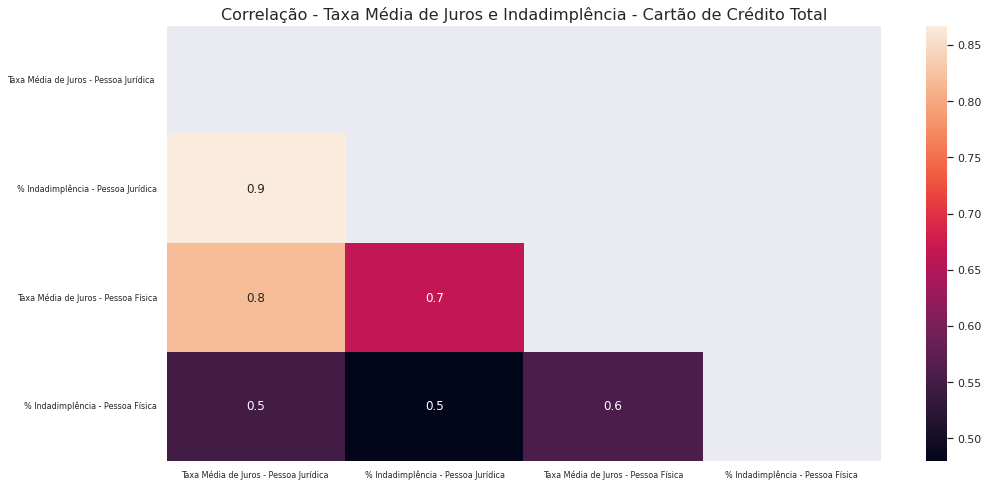

In [107]:
f, ax = plt.subplots(figsize=(16,8))
# Generate a mask for upper triangle
mask = np.triu(np.ones_like(correlation_total, dtype=bool))
# Configure a palette colormap
cmap = sns.color_palette("rocket", as_cmap=True)
# Draw the heatmap
plot = sns.heatmap(correlation_total, annot=True, mask = mask, fmt=".1f", cmap=cmap)
plot.set_yticklabels(plot.get_yticklabels(), rotation = 0, fontsize = 8)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 0, fontsize = 8)
plot.set_title('Correlação - Taxa Média de Juros e Indadimplência - Cartão de Crédito Total', fontsize = 16)
plot

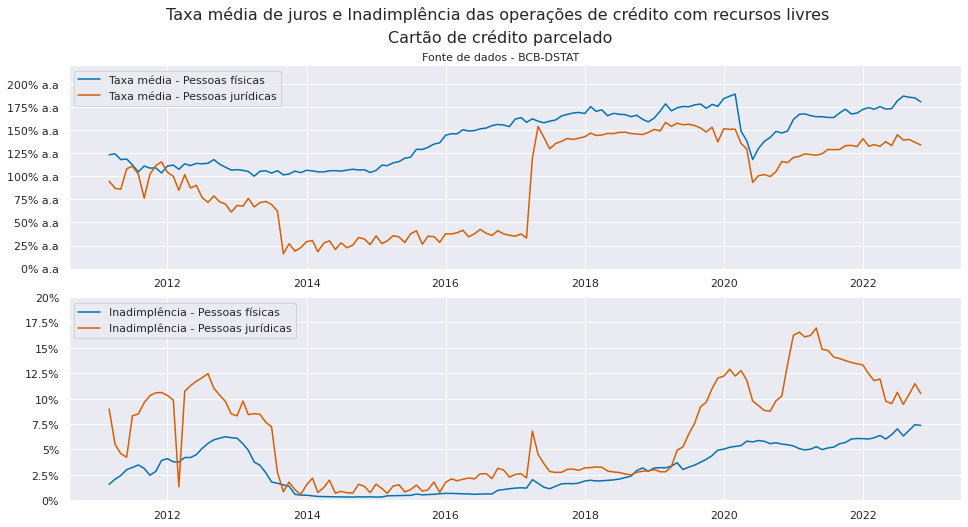

In [101]:
matplotlib.rcParams['figure.figsize'] = (16,8)
fig, (ax1,ax2) = plt.subplots(2, sharex=False)
#Títulos do gráfico
plt.text(x=0.5, y=0.96, s="Taxa média de juros e Inadimplência das operações de crédito com recursos livres ", fontsize=16, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.92, s= "Cartão de crédito parcelado", fontsize=16, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.89, s= "Fonte de dados - BCB-DSTAT", fontsize=11, ha="center", transform=fig.transFigure)
#Plotagem das Séries
ax1.plot(tx_cred_pfis_parcelado, color='#0072B2')
ax1.plot(tx_cred_pjur_parcelado, color='#D55E00')
ax2.plot(inadimp_pfis_parcelado, color='#0072B2')
ax2.plot(inadimp_pjur_parcelado, color='#D55E00')
#Legenda dos Rótulos
ax1.legend(['Taxa média - Pessoas físicas','Taxa média - Pessoas jurídicas'], fontsize=11)
ax2.legend(['Inadimplência - Pessoas físicas','Inadimplência - Pessoas jurídicas'], fontsize=11)
#Escalando os valores e formatando o eixo y
scale_y = 1
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}% a.a'.format(x/scale_y))
ax1.yaxis.set_major_formatter(ticks_y)
ticks_y2 = ticker.FuncFormatter(lambda x, pos: '{0:g}%'.format(x/scale_y))
ax2.yaxis.set_major_formatter(ticks_y2)
#Definindo limites dos eixos y
ax1.set_ylim([0,220])
ax2.set_ylim([0,20])
#Ajuste de espaçamento entre subplots
plt.subplots_adjust(hspace=.14)
plt.show()

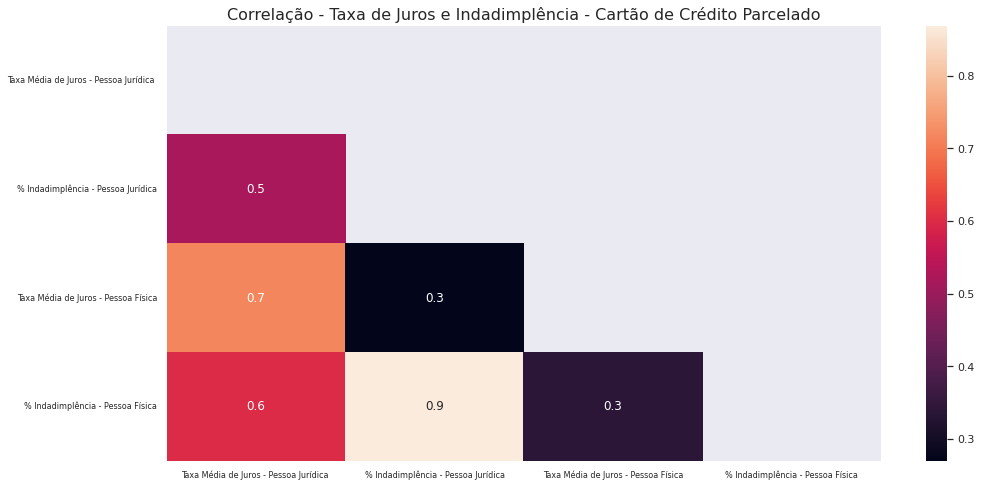

In [108]:
f, ax = plt.subplots(figsize=(16,8))
# Generate a mask for upper triangle
mask = np.triu(np.ones_like(correlation_parcelado, dtype=bool))
# Configure a palette colormap
cmap = sns.color_palette("rocket", as_cmap=True)
# Draw the heatmap
plot = sns.heatmap(correlation_parcelado, annot=True, mask = mask, fmt=".1f", cmap=cmap)
plot.set_yticklabels(plot.get_yticklabels(), rotation = 0, fontsize = 8)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 0, fontsize = 8)
plot.set_title('Correlação - Taxa de Juros e Indadimplência - Cartão de Crédito Parcelado', fontsize = 16)
plot

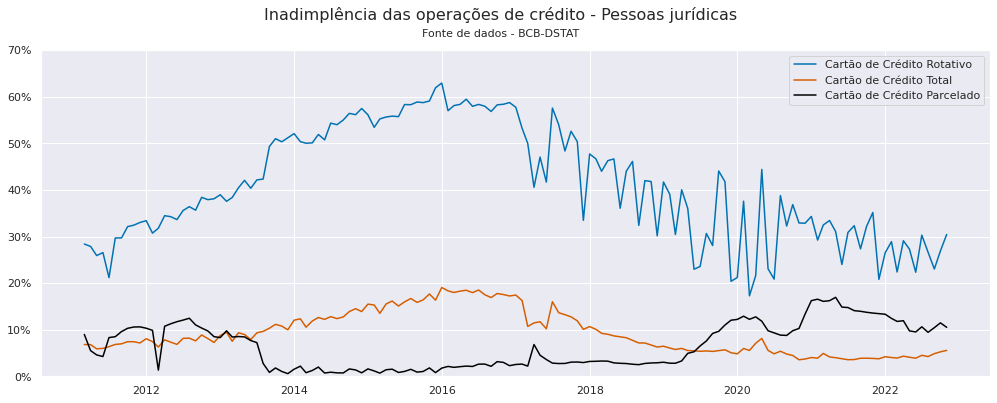

In [103]:
matplotlib.rcParams['figure.figsize'] = (17,6)
fig, (ax1) = plt.subplots(1, sharex=False)
#Títulos do gráfico
plt.text(x=0.5, y=0.95, s="Inadimplência das operações de crédito - Pessoas jurídicas", fontsize=16, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.91, s= "Fonte de dados - BCB-DSTAT", fontsize=11, ha="center", transform=fig.transFigure)
#Plotagem das Séries
ax1.plot(inadimp_pjur_rotativo, color='#0072B2')
ax1.plot(inadimp_pjur_total, color='#D55E00')
ax1.plot(inadimp_pjur_parcelado, color='#000000')
#Legenda dos Rótulos
ax1.legend(['Cartão de Crédito Rotativo','Cartão de Crédito Total', 'Cartão de Crédito Parcelado'], fontsize=11)
#Escalando os valores e formatando o eixo y
scale_y = 1
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}%'.format(x/scale_y))
ax1.yaxis.set_major_formatter(ticks_y)
#Definindo limites dos eixos y
ax1.set_ylim([0,70])
plt.show()

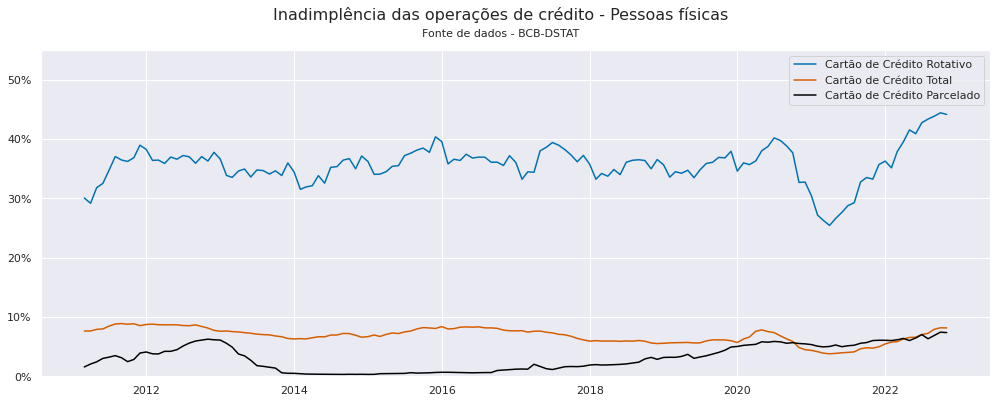

In [104]:
matplotlib.rcParams['figure.figsize'] = (17,6)
fig, (ax1) = plt.subplots(1, sharex=False)
#Títulos do gráfico
plt.text(x=0.5, y=0.95, s="Inadimplência das operações de crédito - Pessoas físicas", fontsize=16, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.91, s= "Fonte de dados - BCB-DSTAT", fontsize=11, ha="center", transform=fig.transFigure)
#Plotagem das Séries
ax1.plot(inadimp_pfis_rotativo, color='#0072B2')
ax1.plot(inadimp_pfis_total, color='#D55E00')
ax1.plot(inadimp_pfis_parcelado, color='#000000')
#Legenda dos Rótulos
ax1.legend(['Cartão de Crédito Rotativo','Cartão de Crédito Total', 'Cartão de Crédito Parcelado'], fontsize=11)
#Escalando os valores e formatando o eixo y
scale_y = 1
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}%'.format(x/scale_y))
ax1.yaxis.set_major_formatter(ticks_y)
#Definindo limites dos eixos y
ax1.set_ylim([0,55])
plt.show()

# Conclusão

O **crédito rotativo** funciona como um empréstimo pré-aprovado que tem como objetivo evitar que a fatura do cartão de crédito não seja paga. Dessa forma, o valor que fica em aberto é somado à próxima fatura, acrescido de juros.

Porém, essa é uma armadilha: as taxas de juros do rotativo estão entre as mais caras do mercado, dada a alta taxa de inadimplência (falta de cumprimento de uma obrigação).

Por isso, mesmo em situações emergenciais, essa alternativa deve ser evitada.

# Correlações:

Como podemos interpretar os valores que ρ pode assumir?

* ρ = 0,9 a 1,0 (positivo ou negativo): correlação muito forte;
* ρ = 0,7 a 0,9 (positivo ou negativo): correlação forte;
* ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
* ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
* ρ = 0,0 a 0,3 (positivo ou negativo): não possui correlação.


Nos casos analisados podemos notar a correlações fortes, ou seja:

Quanto mais devedores inadimplentes, maiores as taxas de juros dos credores.
Quanto menos devedores inadimplentes, menores as taxas de juros dos credores.